# **Trabalho 1ºbim**

Projeto visa analisar os dados obtidos pelo site da prefeitura de Curitiba, sobre os cargos e encargos


Os dados foram extraídos do site abaixo:

https://www.curitiba.pr.gov.br/dadosabertos/busca/

In [8]:
import numpy as np
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df = pd.read_csv('/content/drive/MyDrive/UP/2022/Data science/Trabalho_1/Dataset/2022-10-05_Servidores_Cargos_Encargos_-_Base_de_Dados.csv',
                    sep=';', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3,4,6,7,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Extração e Limpeza dos dados

In [11]:
df.head()

,NOME,CARGO,CARGO_COMISSAO,MES,ANO,LOTACAO,TOTAL_DESCONTOS,TOTAL_LIQUIDO,TOT_VANTAGENS,MOTIVO,DESCRICAO_EVENTO,VALOR_EVENTO,TIPO_EVENTO
0,----,-----,--------------,---,---,-------,---------------,-------------,-------------,------,----------------,------------,-----------
1,ABDO TARBINE,GESTOR PUBLICO MUNICIPAL I,CARGO EM COMISSÃO,9,2022,SECRETARIA DO GOVERNO MUNICIPAL,3050.76,9020.32,12071.08,NaN,PORTAL TRANSPARÊNCIA - IRRF,2222.38,DESCONTO
2,ABDO TARBINE,GESTOR PUBLICO MUNICIPAL I,CARGO EM COMISSÃO,9,2022,SECRETARIA DO GOVERNO MUNICIPAL,3050.76,9020.32,12071.08,NaN,PORTAL TRANSPARÊNCIA - PREVIDÊNCIA PÚBLICA,828.38,DESCONTO
3,ABDO TARBINE,GESTOR PUBLICO MUNICIPAL I,CARGO EM COMISSÃO,9,2022,SECRETARIA DO GOVERNO MUNICIPAL,3050.76,9020.32,12071.08,NaN,"PORTAL TRANSPARÊNCIA - SUBSÍDIO, FG OU CARGO E...",12071.08,VANTAGEM
4,ABEGAIL APARECIDA LOPES,AGENTE ADMINISTRATIVO,NaN,9,2022,FUNDAÇÃO DE AÇÃO SOCIAL,2250.25,5377.56,7627.81,NaN,PORTAL TRANSPARÊNCIA - BENEFÍCIOS,374.00,VANTAGEM


Quantidade de registros

In [ ]:
print("O total de registros foi de " + str(df.shape[0]))

O total de registros foi de 194804


Remover colunas de descontos e vantagens

In [12]:
list_drop_columns = ['TIPO_EVENTO', 
                     'MOTIVO']


df_aux = df.drop(columns=list_drop_columns)

df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194804 entries, 0 to 194803
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   NOME              194804 non-null  object
 1   CARGO             194801 non-null  object
 2   CARGO_COMISSAO    2938 non-null    object
 3   MES               194804 non-null  object
 4   ANO               194804 non-null  object
 5   LOTACAO           194804 non-null  object
 6   TOTAL_DESCONTOS   194804 non-null  object
 7   TOTAL_LIQUIDO     194804 non-null  object
 8   TOT_VANTAGENS     194804 non-null  object
 9   DESCRICAO_EVENTO  194572 non-null  object
 10  VALOR_EVENTO      194804 non-null  object
dtypes: object(11)
memory usage: 16.3+ MB


In [ ]:
df.head()

,NOME,CARGO,CARGO_COMISSAO,MES,ANO,LOTACAO,TOTAL_DESCONTOS,TOTAL_LIQUIDO,TOT_VANTAGENS,MOTIVO,DESCRICAO_EVENTO,VALOR_EVENTO,TIPO_EVENTO
0,----,-----,--------------,---,---,-------,---------------,-------------,-------------,------,----------------,------------,-----------
1,ABDO TARBINE,GESTOR PUBLICO MUNICIPAL I,CARGO EM COMISSÃO,9,2022,SECRETARIA DO GOVERNO MUNICIPAL,3050.76,9020.32,12071.08,NaN,PORTAL TRANSPARÊNCIA - IRRF,2222.38,DESCONTO
2,ABDO TARBINE,GESTOR PUBLICO MUNICIPAL I,CARGO EM COMISSÃO,9,2022,SECRETARIA DO GOVERNO MUNICIPAL,3050.76,9020.32,12071.08,NaN,PORTAL TRANSPARÊNCIA - PREVIDÊNCIA PÚBLICA,828.38,DESCONTO
3,ABDO TARBINE,GESTOR PUBLICO MUNICIPAL I,CARGO EM COMISSÃO,9,2022,SECRETARIA DO GOVERNO MUNICIPAL,3050.76,9020.32,12071.08,NaN,"PORTAL TRANSPARÊNCIA - SUBSÍDIO, FG OU CARGO E...",12071.08,VANTAGEM
4,ABEGAIL APARECIDA LOPES,AGENTE ADMINISTRATIVO,NaN,9,2022,FUNDAÇÃO DE AÇÃO SOCIAL,2250.25,5377.56,7627.81,NaN,PORTAL TRANSPARÊNCIA - BENEFÍCIOS,374.00,VANTAGEM


In [13]:
import seaborn as sns

In [14]:
import scipy.stats as stats

In [15]:
import matplotlib.pyplot as plt

In [44]:
valorx = df.loc[df.TOTAL_LIQUIDO == 12071.08]

In [45]:
valor_final = ['TOTAL_LIQUIDO','TOTAL_DESCONTOS','TOT_VANTAGENS','VALOR_EVENTO']

In [46]:
valorx['valor_final'] = (valorx[valor_final].mean(axis=1))

In [49]:
valor_final

['TOTAL_LIQUIDO', 'TOTAL_DESCONTOS', 'TOT_VANTAGENS', 'VALOR_EVENTO']

In [50]:
valorx.head()

,NOME,CARGO,CARGO_COMISSAO,MES,ANO,LOTACAO,TOTAL_DESCONTOS,TOTAL_LIQUIDO,TOT_VANTAGENS,MOTIVO,DESCRICAO_EVENTO,VALOR_EVENTO,TIPO_EVENTO,valor_final


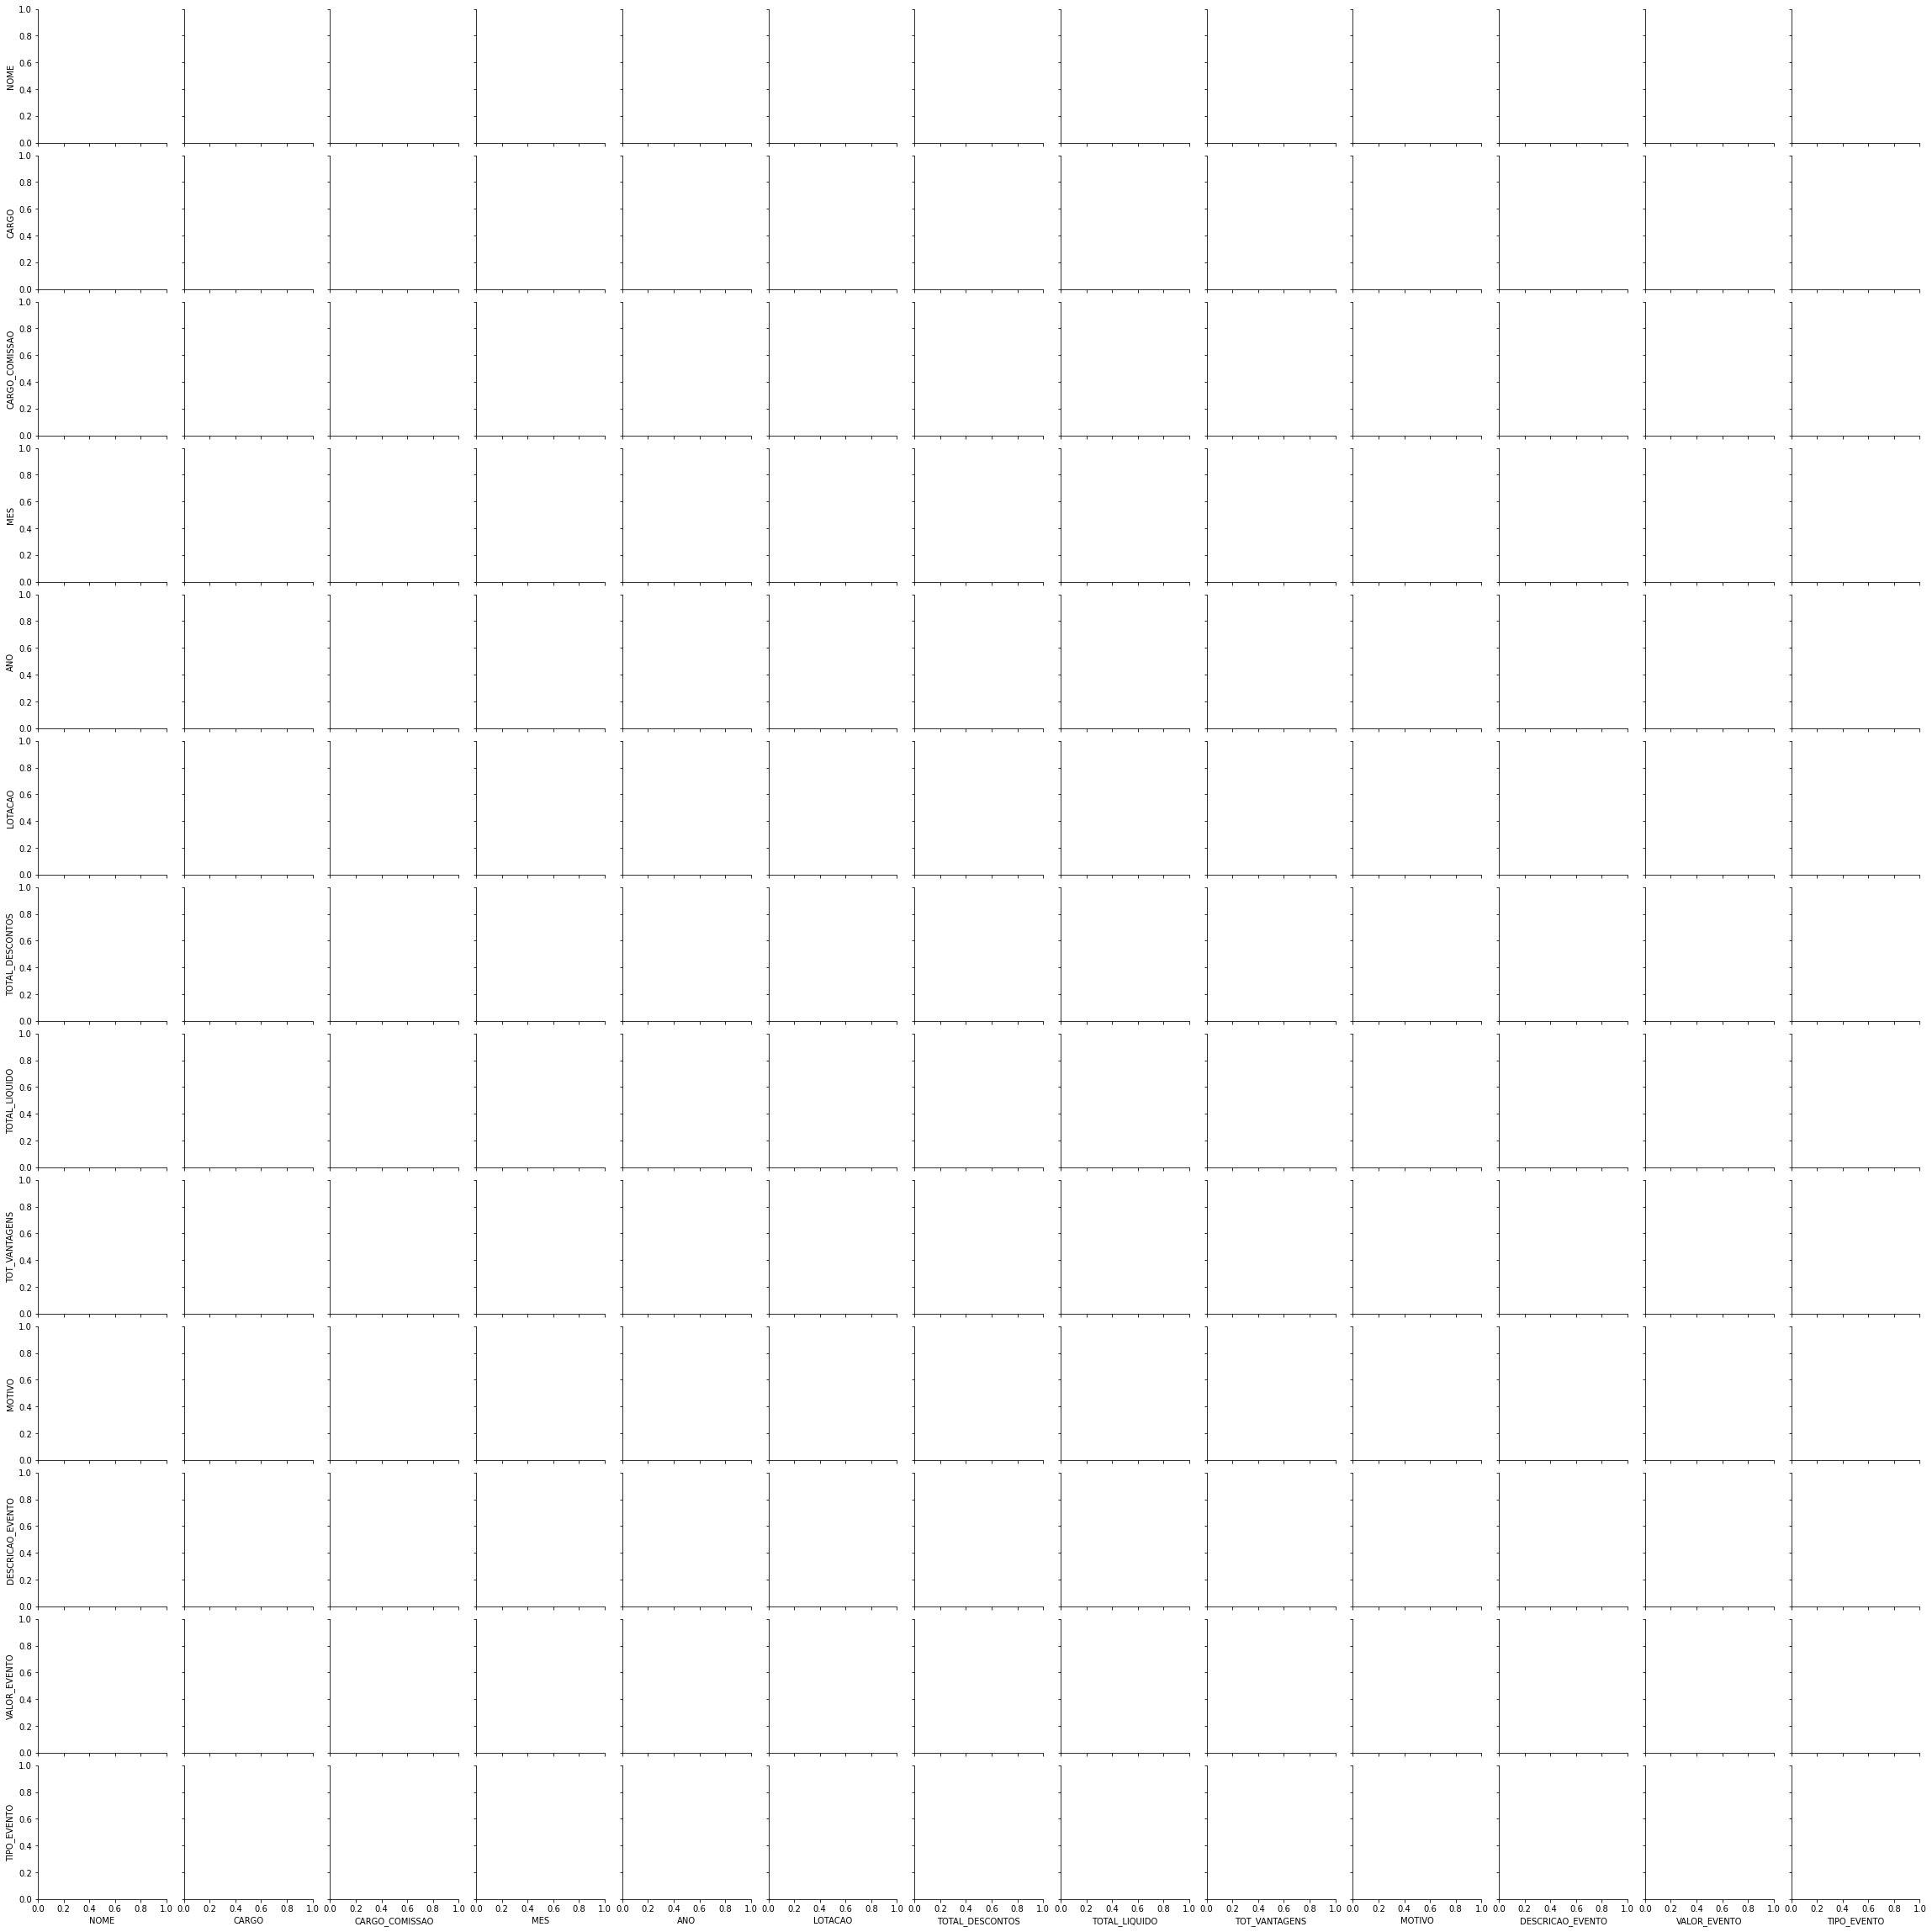

In [34]:
sns.pairplot(valorx)

In [51]:
df_aux.to_csv('/content/drive/MyDrive/UP/2022/Data science/Trabalho_1/Dataset/2022-10-05_Servidores_Cargos_Encargos_-_Base_de_Dados_tratado.csv', index=False)